### Postprocessing the Baysor segmentations
##### Baysor has many instances where a cell does not overlap with a nucleus, or a cell contains multiple nuclei. This script seeks to correct that. We are very confident in our nuclei segmentations, and therefore are able to make these adjustments with confidence

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from collections import Counter
import glob
import alphashape
import geopandas as gpd
import seaborn as sns
from shapely.ops import transform
import imageio as io
from core_functions.baysor_postprocessing import *
import warnings
from concurrent.futures import ThreadPoolExecutor 


##### Put the path to the folders where the Baysor runs are stored

In [2]:
data_dir = '/mnt/sata1/Analysis_Alex/human_r1'

##### Create anndatas from processing Baysor Segmentation

In [3]:
input_folders = glob.glob(os.path.join(data_dir, 'human_0*'))

#### To run without multithreading

  0%|          | 0/4 [00:00<?, ?it/s]

/mnt/sata1/Analysis_Alex/human_r1/human_09_r2
Adatas dir already exists
Preparing Transcripts... done
Assigning nuclei to Baysor Cells... done
Finding the most common nucleus per cell... done
Splitting cells with multiple nucleus assignments... done
Making adata... done


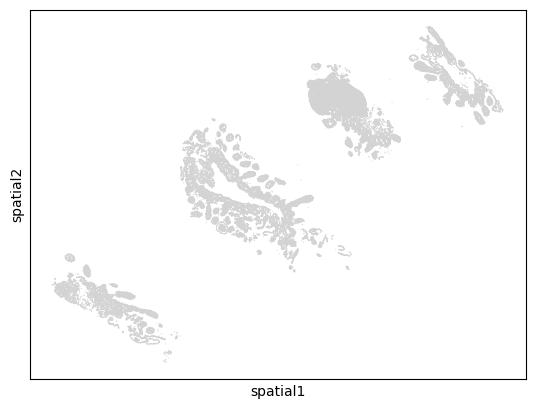

/mnt/sata1/Analysis_Alex/human_r1/human_05_r1
Preparing Transcripts... done
Assigning nuclei to Baysor Cells... done
Finding the most common nucleus per cell... done
Splitting cells with multiple nucleus assignments... done
Making adata... done


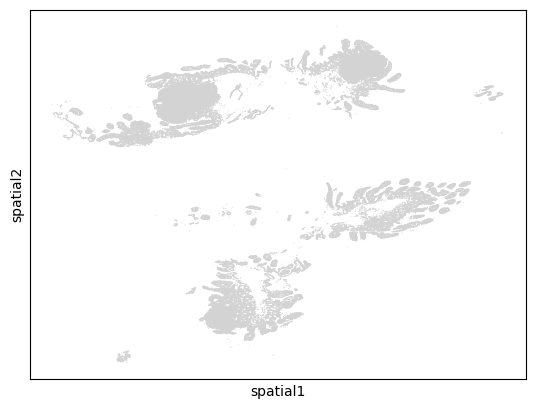

/mnt/sata1/Analysis_Alex/human_r1/human_09_r1
Adatas dir already exists
Preparing Transcripts... done
Assigning nuclei to Baysor Cells... done
Finding the most common nucleus per cell... done
Splitting cells with multiple nucleus assignments... done
Making adata... done


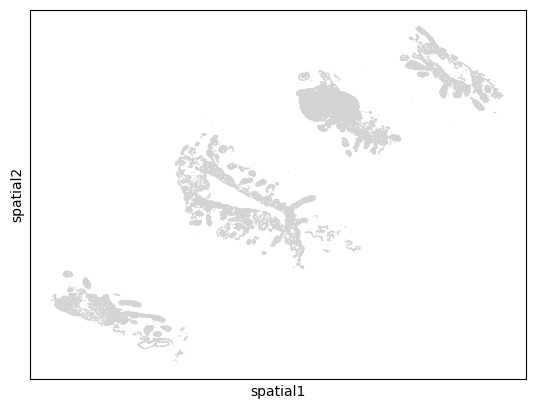

/mnt/sata1/Analysis_Alex/human_r1/human_05_r2
Preparing Transcripts... done
Assigning nuclei to Baysor Cells... done
Finding the most common nucleus per cell... done
Splitting cells with multiple nucleus assignments... done
Making adata... done


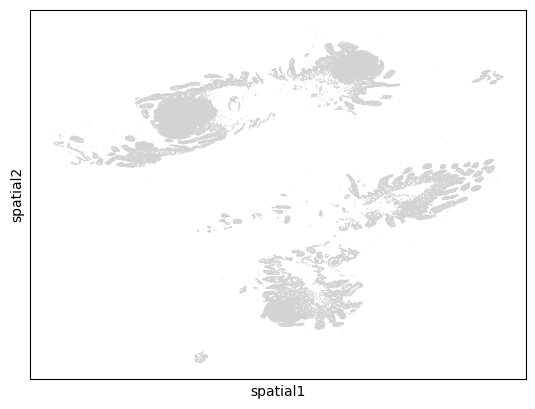

In [5]:
warnings.filterwarnings("ignore")
for input_file in tqdm(input_folders):
    print(input_file)
    try: 
        os.mkdir(os.path.join(input_file, 'adatas'))
    except:
        print('Adatas dir already exists')

    print('Preparing Transcripts...', end = ' ')
    transcripts, transcripts_cellpose = prepare_transcripts(input_file)
    print('done')
    
    print('Assigning nuclei to Baysor Cells...', end = ' ')
    result = assign_nuclei_to_cells(transcripts, transcripts_cellpose)
    print('done')

    print('Finding the most common nucleus per cell...', end = ' ')
    transcripts_with_gt_and_main_nucleus_filtered,  groupby_most_common_nucleus = find_main_nucleus(transcripts, transcripts_cellpose, result)
    print('done')

    print('Splitting cells with multiple nucleus assignments...', end = ' ')
    transcripts_with_gt_and_main_nucleus_filtered = reassign_multiple_nuclei(transcripts_with_gt_and_main_nucleus_filtered, groupby_most_common_nucleus)
    print('done')

    print('Making adata...', end = ' ')
    anndata = make_adata(transcripts_with_gt_and_main_nucleus_filtered)
    print('done')
    sc.pl.embedding(anndata, basis = 'spatial')
    anndata.write(os.path.join(input_file, 'adatas', '01_preprocessed.h5ad'))

